In [6]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import itertools
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

# Load Data

In [7]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = y_train.flatten()
y_test = y_test.flatten()

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Normalization and Reshaping

In [8]:
input_shape = (32, 32, 3)

x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_train = x_train / 255.0
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)
x_test = x_test / 255.0

# Label encoding

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


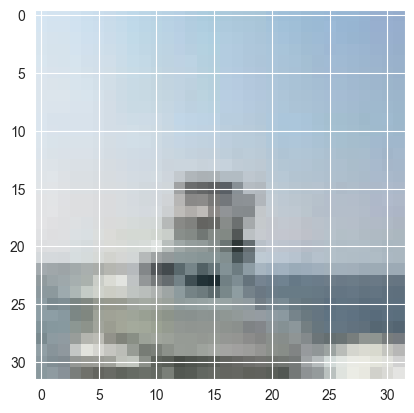

In [9]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

plt.imshow(x_train[100])
print(y_train[100])

# Define the model

In [10]:
batch_size = 32
num_classes = 10
epochs = 50

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, 3, padding='same', input_shape=x_train.shape[1:], activation='relu'),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(optimizer=tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-06),
              loss='categorical_crossentropy', metrics=['acc'])

# Fit the training data

In [11]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs)

Epoch 1/50


2022-12-14 11:18:01.763514: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1563/1563 [==============================] - 47s 30ms/step - loss: 1.8015 - acc: 0.3388
Epoch 2/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4952 - acc: 0.4580
Epoch 3/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3687 - acc: 0.5098
Epoch 4/50
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2708 - acc: 0.5477
Epoch 5/50
1563/1563 [==============================] - 45s 28ms/step - loss: 1.1922 - acc: 0.5773
Epoch 6/50
1563/1563 [==============================] - 175s 112ms/step - loss: 1.1263 - acc: 0.6038
Epoch 7/50
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0749 - acc: 0.6202
Epoch 8/50
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0270 - acc: 0.6390
Epoch 9/50
1563/1563 [==============================] - 236s 151ms/step - loss: 0.9890 - acc: 0.6531
Epoch 10/50
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9554 - acc: 0.6657
Epoch 11/50
1563

# Evaluation the Model
## Loss and Accuracy curves

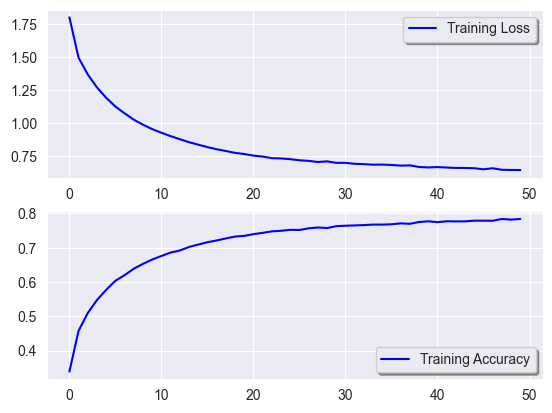

In [12]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(history.history['loss'], color='b', label="Training Loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Predict Results

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 [==============================] - 3s 8ms/step - loss: 0.6573 - acc: 0.7862


# Confusion Matrix

In [14]:
# Predict the values from the validation dataset
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1)
# compute the confusion matrix
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 3s 8ms/step


[[Text(0.5, 0, 'airplane'),
  Text(1.5, 0, 'automobile'),
  Text(2.5, 0, 'bird'),
  Text(3.5, 0, 'cat'),
  Text(4.5, 0, 'deer'),
  Text(5.5, 0, 'dog'),
  Text(6.5, 0, 'frog'),
  Text(7.5, 0, 'horse'),
  Text(8.5, 0, 'ship'),
  Text(9.5, 0, 'truck')],
 [Text(0, 0.5, 'airplane'),
  Text(0, 1.5, 'automobile'),
  Text(0, 2.5, 'bird'),
  Text(0, 3.5, 'cat'),
  Text(0, 4.5, 'deer'),
  Text(0, 5.5, 'dog'),
  Text(0, 6.5, 'frog'),
  Text(0, 7.5, 'horse'),
  Text(0, 8.5, 'ship'),
  Text(0, 9.5, 'truck')]]

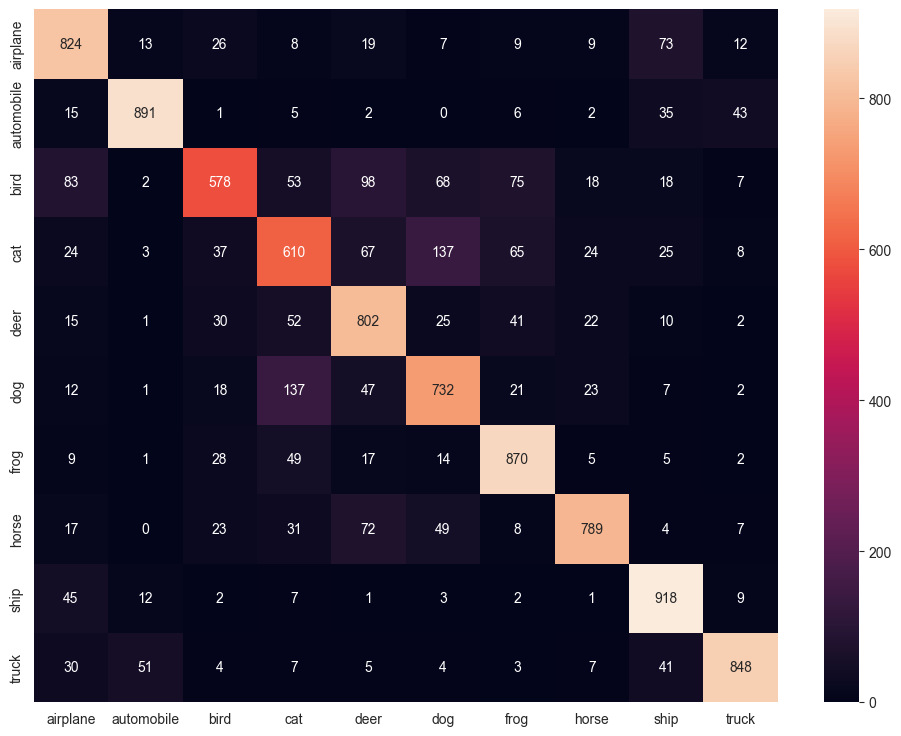

In [15]:
plt.figure(figsize=(12, 9))
c = sns.heatmap(confusion_mtx, annot=True, fmt='g')
c.set(xticklabels=classes, yticklabels=classes)